## Imports

In [1]:
import matplotlib.pyplot as plt
from pprint import pprint
from initial import dataset_from_raw, preprocessing as init_processing

from config import Config
import utils
import numpy as np


INFO:tensorflow:Enabling eager execution
INFO:tensorflow:Enabling v2 tensorshape
INFO:tensorflow:Enabling resource variables
INFO:tensorflow:Enabling tensor equality
INFO:tensorflow:Enabling control flow v2


## Raw Dataset

In [2]:
# !wget https://filebox.ece.vt.edu/~vrama91/CIDEr_miscellanous/cider_datasets.tarB
# !tar -xvf cider_datasets.tar

## Parsing dataset

In [3]:
# dataset_from_raw.dataset_from_raw()
init_processing.annots_preprocessing()


Jenny is telling Mike it is time to go home before they both get in trouble.
Jenny is angry and Mike is scared because there is an owl in the sandbox.
Jenny is angry at Mike for playing in the sandbox.
Jenny is angry that the Owl is in the sandbox with Mike.
Jenny is upset because Mike does not like her owl friend.
An angry Jenny is looking at Mike who is in a sand box.
Jenny wasn't very happy to find Mike in the sandbox with the owl.
An owl decided the sandbox was a nice nest even though Mike and Jenny were playing there.
Jenny is mad that Mike is in the sandbox.
Jenny gestures angrily at Mike, who is playing in a sandbox with an owl.
Angry Jenny throws an owl into Mike's sandbox.
JENNY IS ANGRY AT MIKE AND THE OWL, WHO ARE IN THE SANDBOX.
Jenny is angry at Mike being in the sandbox.
Jenny is angry at the owl, while Mike is afraid of the owl.
Mike and Jenny gets angry at the owl for landing in their sandbox.
Jenny is angry because Mike is in the sand box.
Mike is sitting in the sandb

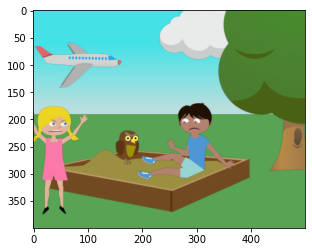

In [4]:
utils.show_example(Config.abstract50s, 3)

In [5]:
exp_targets, targets = utils.get_targets()

{'dining table', 'person'}

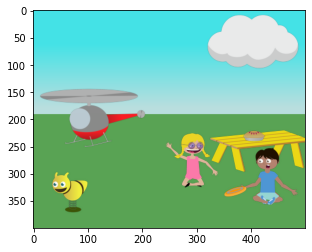

In [6]:
utils.check_target(Config.abstract50s, exp_targets, 11)

In [7]:
images = utils.get_images(Config.abstract50s)

In [8]:
np.save('cache/images.npy', images)
np.save('cache/targets.npy', targets)

In [9]:
targets.shape

(500, 20)